In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [41]:
df = pd.read_csv("Food_Delivery_Times.csv")

In [43]:
categorical_columns = ['Weather', 'Traffic_Level', 'Time_of_Day', 'Vehicle_Type']
for col in categorical_columns:
    df[col] = df[col].astype('category')

In [45]:
df

,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
0,522,7.93,Windy,Low,Afternoon,Scooter,12,1.0,43
1,738,16.42,Clear,Medium,Evening,Bike,20,2.0,84
2,741,9.52,Foggy,Low,Night,Scooter,28,1.0,59
3,661,7.44,Rainy,Medium,Afternoon,Scooter,5,1.0,37
4,412,19.03,Clear,Low,Morning,Bike,16,5.0,68
...,...,...,...,...,...,...,...,...,...
995,107,8.50,Clear,High,Evening,Car,13,3.0,54
996,271,16.28,Rainy,Low,Morning,Scooter,8,9.0,71
997,861,15.62,Snowy,High,Evening,Scooter,26,2.0,81
998,436,14.17,Clear,Low,Afternoon,Bike,8,0.0,55


In [47]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   Order_ID                1000 non-null   int64   
 1   Distance_km             1000 non-null   float64 
 2   Weather                 970 non-null    category
 3   Traffic_Level           970 non-null    category
 4   Time_of_Day             970 non-null    category
 5   Vehicle_Type            1000 non-null   category
 6   Preparation_Time_min    1000 non-null   int64   
 7   Courier_Experience_yrs  970 non-null    float64 
 8   Delivery_Time_min       1000 non-null   int64   
dtypes: category(4), float64(2), int64(3)
memory usage: 43.8 KB
None


In [49]:
print(df.describe(include='all'))

           Order_ID  Distance_km Weather Traffic_Level Time_of_Day  \
count   1000.000000  1000.000000     970           970         970   
unique          NaN          NaN       5             3           4   
top             NaN          NaN   Clear        Medium     Morning   
freq            NaN          NaN     470           390         308   
mean     500.500000    10.059970     NaN           NaN         NaN   
std      288.819436     5.696656     NaN           NaN         NaN   
min        1.000000     0.590000     NaN           NaN         NaN   
25%      250.750000     5.105000     NaN           NaN         NaN   
50%      500.500000    10.190000     NaN           NaN         NaN   
75%      750.250000    15.017500     NaN           NaN         NaN   
max     1000.000000    19.990000     NaN           NaN         NaN   

       Vehicle_Type  Preparation_Time_min  Courier_Experience_yrs  \
count          1000           1000.000000              970.000000   
unique            3  

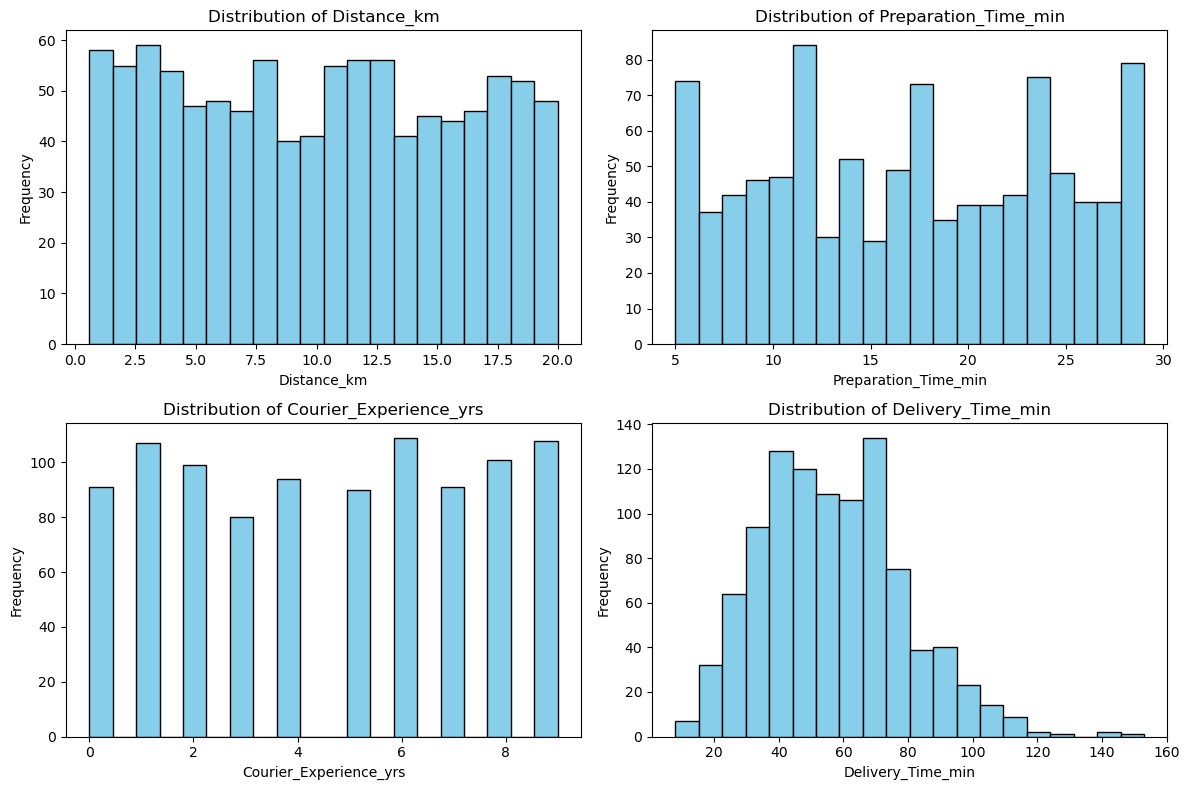

In [51]:
numeric_columns = ['Distance_km', 'Preparation_Time_min', 'Courier_Experience_yrs', 'Delivery_Time_min']
plt.figure(figsize=(12, 8))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(2, 2, i)
    plt.hist(df[col], bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

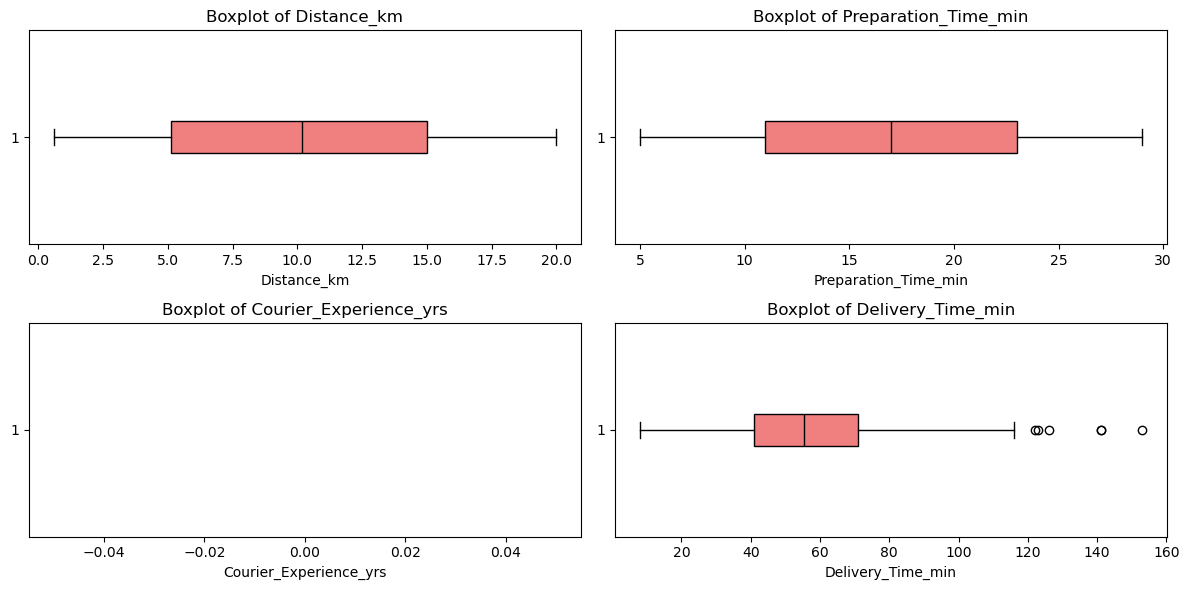

In [52]:
plt.figure(figsize=(12, 6))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(2, 2, i)
    plt.boxplot(df[col], vert=False, patch_artist=True,
                boxprops=dict(facecolor='lightcoral'),
                medianprops=dict(color='black'))
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
plt.tight_layout()
plt.show()

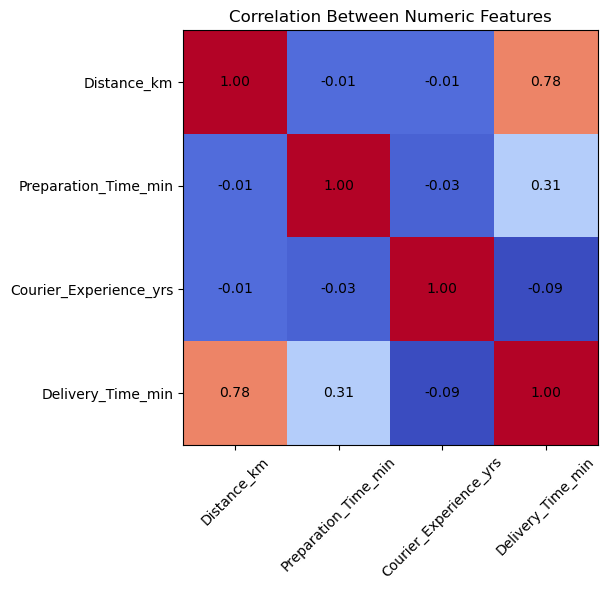

In [53]:
corr_matrix = df[numeric_columns].corr().values
labels = numeric_columns
plt.figure(figsize=(8, 6))
plt.imshow(corr_matrix, cmap='coolwarm', interpolation='nearest')
plt.xticks(np.arange(len(labels)), labels, rotation=45)
plt.yticks(np.arange(len(labels)), labels)
for i in range(len(labels)):
    for j in range(len(labels)):
        plt.text(j, i, f'{corr_matrix[i, j]:.2f}', ha='center', va='center', color='black')
plt.title("Correlation Between Numeric Features")
plt.tight_layout()
plt.show()